Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Stratified Cross Validation, Train Test Split & Prediction Model con "Random Forest Classifier"


- **1.** Visualizzazione dei dati sulle **correlazioni tra le variabili indipendenti e la variabile dipendente**


- **2.** **Divido** il **data frame in X e y**, ovvero mettendo tutte le **variabili numeriche** ricavate in X e la **target variable** da predirre in y;


- **3.** Apppico **StratifiedKFold** e **Train_Test Split** alle variabili indipendenti per poi applicare il modello supervisionato **Random Forest Classifier** per ottenere le **metriche di valutazione**;
    - **StratifiedKFold** è una tecnica di **cross-validation** comunemente utilizzata nell'apprendimento automatico quando si lavora con **dataset sbilanciati**, come il mio, o quando si desidera garantire che ciascun fold (sottoinsieme) del dataset mantenga la stessa distribuzione delle classi del dataset originale. È particolarmente utile quando si desidera **valutare le prestazioni del proprio modello preservando la proporzione delle diverse classi**.
    - **3.1** Costituisco una **confusion matrix** per controllare quanti errori e predizioni corrette sono state eseguite.
    
    

- **4.** Implemento Random Forest Model con l'utilizzo degli hyperparameters:
    - **4.1** **Trovo** gli **Hyperparameters**;
    - **4.2** **Applico** gli **Hyperparameters** trovati al modello Random Forest Classifier;
    

- **5.** Costituisco una **Confusion Matrix** per controllare quanti **errori** e **predizioni corrette** sono state performate;


- **6.** Valutazione delle **Feature Importances** del modello **Random Forest Classifier**;


- **7.** **Conclusioni**.


<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

#### Set pandas options:

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.6f}'.format
pd.options.mode.chained_assignment = None

#### Importo il file CSV per modello: Linear Regrression

In [3]:
df_rf = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\9_Dataset_Random_Forest\\Dataset_Random_Forest.csv")

### 1 - Visualizzazione dei dati sulle correlazioni tra le variabili indipendenti e la variabile dipendente (Destinazione d'uso)

- Grafico delle correlazioni tra ciascuna variabile numerica presente nel mio dataset utilizzando una rappresentazione grafica a mappa termica (heatmap). Inoltre, ho impostato il parametro annot=True al fine di visualizzare immediatamente e chiaramente il valore delle relative correlazioni.

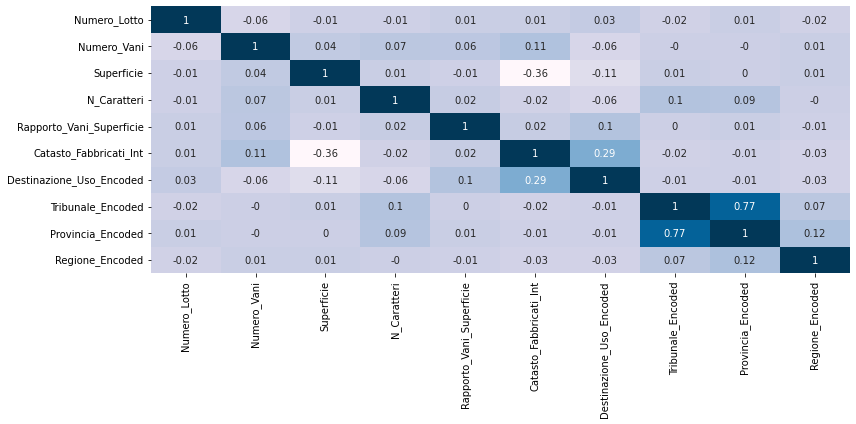

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(round(df_rf.corr(),2), annot=True, cmap='PuBu', cbar=False)
plt.tight_layout()
plt.show()

- Le **correlazioni** più evidenti con la variabile dipendente "**Destinazione_Uso_Encoded**" sono (sia **positive** che **negative**):
    - Rapporto_Vani_Superficie: 0.095;
    - Numero_Lotto: 0.03;
    - Superficie: -0.11;
    - Catasto_Fabbricati_Int: 0.29;

### 2 - Divido il data frame in X e y, ovvero mettendo tutte le variabili numeriche ricavate in X e la target variable da predirre in y

In [5]:
X_rfc = df_rf.drop(columns=['Destinazione_Uso_Encoded', 'Catasto_Fabbricati_Int'])
y_rfc = df_rf['Destinazione_Uso_Encoded']

- Dopo aver testato il modello con la colonna **"Catasto_Fabbricati_Int"**, noto che la classe **LAND** ha un'accuracy del 100% con tutte le fold (3, 5, 7, 10).
- Quindi essendo strettamente identificante la classe LAND è corretto **eliminare** il campo dalla variabile X, ovvero dalle variabili indipendenti per il modello predittivo.

### 3 - Apppico stratifiedKFold e Train Test Split alle variabili indipendenti per ottenere le metriche di valutazione inerenti al modello predittivo Random Forest Classifier:

In [6]:
folds = StratifiedKFold(n_splits=5)

score_precision = []
score_f1 = []
score_recall = []

all_test_indices = []
all_predictions = []

for train_index, test_index in folds.split(X_rfc, y_rfc):
    X_train, X_test, y_train, y_test = X_rfc.iloc[train_index], X_rfc.iloc[test_index], \
                                       y_rfc.iloc[train_index], y_rfc.iloc[test_index]
    
    rfc_model = RandomForestClassifier(n_estimators=350, 
                                       random_state=0)
    rfc_model.fit(X_train, y_train)
    rfc_predictions = rfc_model.predict(X_test)
    
    precision = precision_score(y_test, rfc_predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, rfc_predictions, average='macro', zero_division=0)
    f1 = f1_score(y_test, rfc_predictions, average='macro', zero_division=0)    

    score_precision.append(precision)
    score_recall.append(recall)
    score_f1.append(f1)
    
    all_test_indices.extend(test_index)
    all_predictions.extend(rfc_predictions)

mean_precision = np.mean(score_precision)
mean_recall = np.mean(score_recall)
mean_f1 = np.mean(score_f1)    

classification_report_str = classification_report(y_rfc.iloc[all_test_indices], all_predictions, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str, "\n")
print("Precision:", round(mean_precision, 2))
print("Recall:", round(mean_recall, 2))
print("F1-Score:", round(mean_f1, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.02      0.01       550
           1       0.94      0.69      0.79       560
           2       0.34      0.19      0.25      2269
           3       0.98      0.97      0.98      5804
           4       0.84      0.71      0.77    132207
           5       0.04      0.05      0.05      7743
           6       0.15      0.30      0.20     16907

    accuracy                           0.64    166040
   macro avg       0.47      0.42      0.43    166040
weighted avg       0.73      0.64      0.67    166040
 

Precision: 0.49
Recall: 0.42
F1-Score: 0.44


### 3.1 - Costituisco una confusion matrix per controllare quanti errori e predizioni corrette sono state eseguite

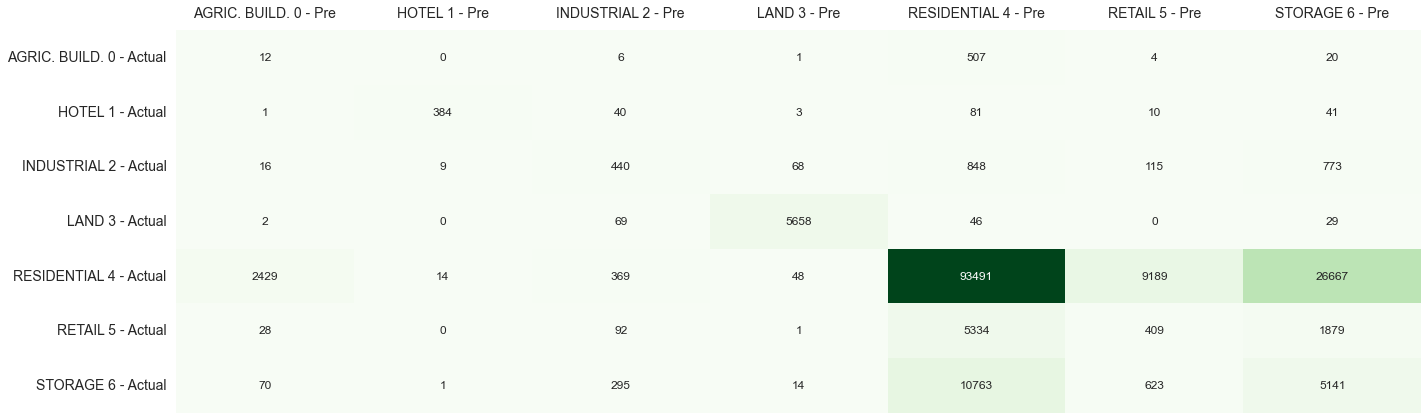

In [7]:
cm_pred = confusion_matrix(y_rfc.iloc[all_test_indices], all_predictions)
cm_pred = pd.DataFrame(cm_pred,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred, 
            annot=True, 
            cmap="Greens", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [23]:
print("Numero predizioni corrette: ", 12+384+440++5658+93491+409+5141)
print("Numero predizioni sbagliate: ", 166040-(12+384+440++5658+93491+409+5141))

Numero predizioni corrette:  105535
Numero predizioni sbagliate:  60505


### 4 - Implemento Random Forest Model con l'utilizzo degli hyperparameters

- **4.1** **Trovo** gli **Hyperparameters**:

In [9]:
# Numero di alberi da 10 a 400 per il moedllo Random Forest ottimizzato:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 10)]
# Numero massimo di livello per ogni albero:
max_depth = [2,4]
# Numero minimo di samples richiesti per splittare un nodo:
min_samples_split = [2, 5]
# Numero minimo di samples richiesti per ogni foglia dell'albero:
min_samples_leaf = [1, 2]
# Metodo di selezione dei samples per trainare ogni albero:
bootstrap = [True, False]
# Creo la parameters grid:
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

# Instanzio il modello Random Forest Classifier:
rf_Model = RandomForestClassifier()
# Applico alla GridSearchCV la ricerca degli hyperparameters istanziati sopra:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
# Applico al data set la gridsearchcv istanziata sopra:
rf_Grid.fit(X_rfc, y_rfc)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 53, 96, 140, 183, 226, 270, 313,
                                          356, 400]},
             verbose=2)

In [10]:
# Stampo gli Hyperparameters trovati:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 53}

- **4.2** **Applico gli Hyperparameters** trovati al modello **Random Forest Classifier**:

In [11]:
X_rfc_1 = df_rf.drop(columns=['Destinazione_Uso_Encoded', 'Catasto_Fabbricati_Int'])
y_rfc_1 = df_rf['Destinazione_Uso_Encoded']

In [18]:
folds_1 = StratifiedKFold(n_splits=5)

score_precision_1 = []
score_f1_1 = []
score_recall_1 = []

all_test_indices_1 = []
all_predictions_1 = []

for train_index_1, test_index_1 in folds_1.split(X_rfc_1, y_rfc_1):
    X_train_1, X_test_1, y_train_1, y_test_1 = X_rfc_1.iloc[train_index_1], X_rfc_1.iloc[test_index_1], \
                                               y_rfc_1.iloc[train_index_1], y_rfc_1.iloc[test_index_1]
      
    rfc_model_1 = RandomForestClassifier(bootstrap=False,
                                         max_depth=4,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=53)
    rfc_model_1.fit(X_train_1, y_train_1)
    rfc_predictions_1 = rfc_model_1.predict(X_test_1)
    
    precision_1 = precision_score(y_test, rfc_predictions_1, average='macro', zero_division=0)
    recall_1 = recall_score(y_test, rfc_predictions_1, average='macro', zero_division=0)
    f1_1 = f1_score(y_test, rfc_predictions_1, average='macro', zero_division=0)    

    score_precision_1.append(precision_1)
    score_recall_1.append(recall_1)
    score_f1_1.append(f1_1)
    
    all_test_indices_1.extend(test_index_1)
    all_predictions_1.extend(rfc_predictions_1)

mean_precision_1 = np.mean(score_precision_1)
mean_recall_1 = np.mean(score_recall_1)
mean_f1_1 = np.mean(score_f1_1)    

classification_report_str_1 = classification_report(y_rfc_1.iloc[all_test_indices_1], all_predictions_1, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_1, "\n")
print("Precision:", round(mean_precision_1, 2))
print("Recall:", round(mean_recall_1, 2))
print("F1-Score:", round(mean_f1_1, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       550
           1       0.00      0.00      0.00       560
           2       0.00      0.00      0.00      2269
           3       0.98      0.97      0.98      5804
           4       0.83      0.98      0.90    132207
           5       0.00      0.00      0.00      7743
           6       0.34      0.08      0.13     16907

    accuracy                           0.82    166040
   macro avg       0.31      0.29      0.29    166040
weighted avg       0.73      0.82      0.76    166040
 

Precision: 0.18
Recall: 0.18
F1-Score: 0.17


### 5 - Costituisco una confusion matrix per controllare quanti errori e predizioni corrette sono state eseguite

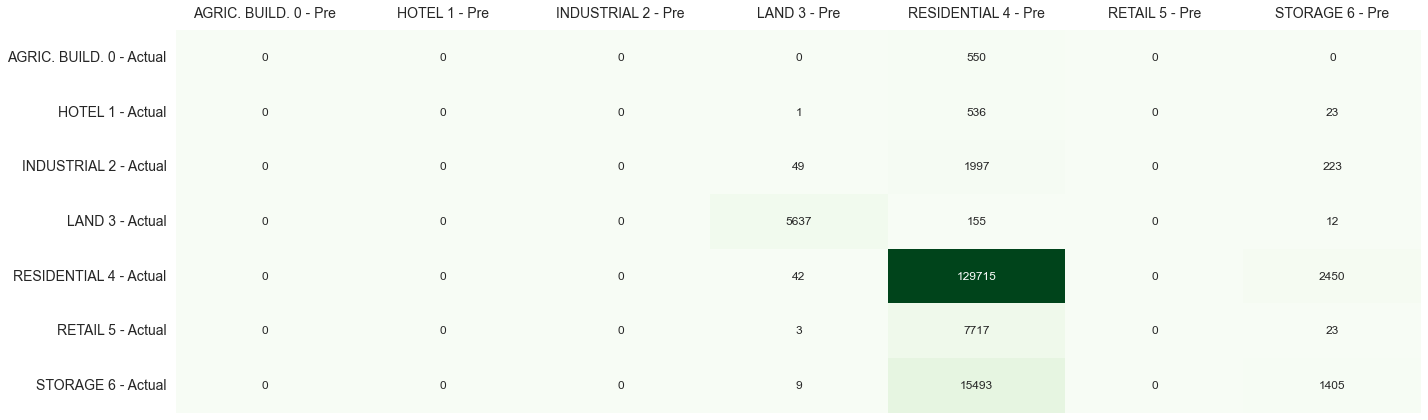

In [20]:
cm_pred_1 = confusion_matrix(y_rfc_1.iloc[all_test_indices_1], all_predictions_1)
cm_pred_1 = pd.DataFrame(cm_pred_1,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_1, 
            annot=True, 
            cmap="Greens", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [21]:
print("Numero predizioni corrette: ", 0+0+0+5637+129715+0+1405)
print("Numero predizioni sbagliate: ", 166040-(0+0+0+5637+129715+0+1405))

Numero predizioni corrette:  136757
Numero predizioni sbagliate:  29283


### 6 - Feature Importance del modello Random Forest Classifier Applicato al data frame

In [22]:
feature_importances = rfc_model.feature_importances_
Colonne_X_rfc = X_rfc.columns.to_list()
feature_importances_dict = {'Feature': Colonne_X_rfc, 'Feature Importance': feature_importances}
feature_importances_df = pd.DataFrame(feature_importances_dict)
feature_importances_df = feature_importances_df.sort_values(by= 'Feature Importance', ascending= False)
display(feature_importances_df.head(8))

,Feature,Feature Importance
3,N_Caratteri,0.199049
2,Superficie,0.192929
1,Numero_Vani,0.187566
4,Rapporto_Vani_Superficie,0.185196
5,Tribunale_Encoded,0.072440
6,Provincia_Encoded,0.061373
0,Numero_Lotto,0.054323
7,Regione_Encoded,0.047124


<hr style="border:1px solid black">


### 7 - Conclusioni

Con **N° fold uguale a 5**, queste sono le metriche di valutazione del modello **prima degli Hyperparameters**:

- **Metrics**:
    - Precision: 0.49;
    - Recall: 0.42;
    - <u>**F1-Score: 0.44**</u>;
    

- **Random Forest Classifier Accuracy score prima degli Hyperparameters**: 
    - Mean Accuracy Score:  **0.64**;
    
    
- **Predizioni corrette** ed **Errori** del modello:
    - Numero predizioni corrette:  **105.535**;
    - Numero predizioni sbagliate: **60.505**;
    

- **Metrics** con gli **Hyperparameters**:
    - Precision: 0.18;
    - Recall: 0.18;
    - F1-Score: 0.17;


- **Random Forest Classifier Accuracy score Mean**: 
    - Mean Accuracy Score:  **0.82**;


- **Predizioni corrette** ed **Errori** del modello:
    - Numero predizioni corrette:  **136.757**;
    - Numero predizioni sbagliate:  **29.283**;


<hr style="border:1px solid black">


#### In conclusione

- Le uniche classi che sono state predette in maniera più o meno corretta sono quelle inerenti ai beni: **Residential** e **Land**, raggiungendo in questo caso livelli di predizioni corrette molto alte;


- Tutte le restanti classi non hanno raggiungo una soglia di predizione diversa dallo 0, se non per la classe 6 (**Storage**), che raggiunge il **0.13** di **F1 Score**;


- La **F1-Score** di riferimento in questo caso è pari a **0.44**, utile a definire un **secondo Benchmark**;


- Da sottolineare il miglioramento delle metriche i riferimento inerenti al modello utilizzato prima e dopo gli **hyperparameters**:
    - **Prima (Accuracy): 0.64**;
    - **Dopo (Accuracy): 0.82**;
    - Tuttavia, l'F1 Score è la metrica da tenere in considerazione in questo caso, ed essa non è migliorata con gli hyperparametri.
    - Difatti, *l'**F1-Score** è una metrica di valutazione utilizzata in machine learning per misurare la precisione di un modello di classificazione, come la logistic regression, sulla base delle previsioni effettuate dal modello. In particolare, l'F1-Score tiene conto di due importanti metriche di valutazione: la precision e il recall. Queste metriche sono calcolate a partire dalla matrice di confusione, che è una tabella che mostra il numero di veri positivi (TP), falsi positivi (FP), veri negativi (TN) e falsi negativi (FN) generati dal modello.*
    - L'**F1-Score è particolarmente utile quando si tratta di problemi di classificazione in cui le classi sono sbilanciate** o quando si desidera trovare un equilibrio tra precisione e recall.

- L'utilizzo degli **hyperparameters** non ha portato ad una miglioria della F1 Score.
    - L'utilizzo di **GridsearchCV** ha portato tutta via ad una notevole **diminuzione degli errori complessivi**, da **60.505** a **29.283**.
    - A **discapito però delle classi sottorappresentate**, le quali hanno visto una diminuizione delle values predette correttamente.
    - Gli hyperparameters trovati sono i seguenti:
        - *{'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 53}*.
    

- Le **Feature importance** con peso maggiore (**positivo**) sono le seguenti:
    - *Numero_Vani*;
    - *Superficie*;
    - *Rapporto_Vani_Superficie*;
    - *N_Caratteri*.
    

- Le colonne inerenti all'ubicazione sia per **Provincia** che per **Tribunale** di assegnazione, **hanno rilevanza inferiore** per il modello in questione, **a differenza di logistic regression**, dove anzì, era stato dimostrato il contrario.